In [1]:
import pandas as pd
import numpy as np
from utility import *

#ploting libreries
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn as sns


In [2]:
tickers = get_ticker_name()
stock_example = tickers[0]
print(stock_example)

df = get_stock_data(filename=stock_example)
# print(df.head())

df = calculate_daily_return(df)
# print(df.head())
print("=="*20)
# invested = 100
# print(f"invested amount in {stock_example}: ", invested)
print(f"calculated ROI between 2022 and 2024: ",calculate_roi(df=df,syear=2022,eyear=2024))
print("Mean: ",calculate_mean(df=df,syear=2022,eyear=2024))
print("std: ",calculate_stdv(df=df,syear=2022,eyear=2024))
print("COV: ",calculate_cv(df=df,syear=2022,eyear=2024))

save_df_to_csv(df,stock_example)


ADANIENT.NS
calculated ROI between 2022 and 2024:  18.60044158515355
Mean:  0.0030085366400590305
std:  0.03351982083584625
COV:  11.141569755051599
ADANIENT.NS Data saved successfully


In [3]:
for ticker in tickers:
    df = get_stock_data(ticker)
    df = calculate_daily_return(df)
    save_df_to_csv(df=df,ticker=ticker)

ADANIENT.NS Data saved successfully
ADANIPORTS.NS Data saved successfully
APOLLOHOSP.NS Data saved successfully
ASIANPAINT.NS Data saved successfully
AXISBANK.NS Data saved successfully
BAJAJ-AUTO.NS Data saved successfully
BAJFINANCE.NS Data saved successfully
BAJAJFINSV.NS Data saved successfully
BPCL.NS Data saved successfully
BHARTIARTL.NS Data saved successfully
BRITANNIA.NS Data saved successfully
CIPLA.NS Data saved successfully
COALINDIA.NS Data saved successfully
DIVISLAB.NS Data saved successfully
DRREDDY.NS Data saved successfully
EICHERMOT.NS Data saved successfully
GRASIM.NS Data saved successfully
HCLTECH.NS Data saved successfully
HDFCBANK.NS Data saved successfully
HDFCLIFE.NS Data saved successfully
HEROMOTOCO.NS Data saved successfully
HINDALCO.NS Data saved successfully
HINDUNILVR.NS Data saved successfully
ICICIBANK.NS Data saved successfully
ITC.NS Data saved successfully
INDUSINDBK.NS Data saved successfully
INFY.NS Data saved successfully
JSWSTEEL.NS Data saved s

## Creating seperate Dataframe to check MEAN, STD, Coeff of Coefficient of Variation

In [4]:
def get_cv_roi(tickers, syear=None, eyear=None):
    cols = ['Tickers', 'Mean','Std','CV', 'ROI']
    cv_roi_df = pd.DataFrame(columns=cols)
    for ticker in tickers:
        df = get_stock_data(ticker)
        #checking if user want different years
        if ((syear != None) and (eyear !=None)):
            new_df = df[(df.index.year >= syear) & (df.index.year <=eyear)]
        else:
            new_df = df.copy()
        mean = calculate_mean(new_df,syear,eyear)
        std = calculate_stdv(new_df,syear,eyear)
        cv = calculate_cv(new_df,syear,eyear)
        roi = calculate_roi(new_df,syear=syear,eyear=eyear)

        cv_roi_df.loc[len(cv_roi_df)] = [ticker,mean,std,cv,roi]

    cv_roi_df.set_index('Tickers',inplace= True)

    return cv_roi_df

    

In [5]:
#calculating on last 2 years
cv_roi_df = get_cv_roi(tickers,syear=2022,eyear=2024)
cv_roi_df.sort_values(by='CV',ascending= True).head()

,Mean,Std,CV,ROI
Tickers,,,,
WIPRO.NS,-0.000271,0.016028,-59.115361,-0.235370
BAJAJ-AUTO.NS,0.002160,0.014611,6.764769,2.961848
NTPC.NS,0.002144,0.016900,7.882189,2.821871
ITC.NS,0.001502,0.012136,8.077594,1.607151
M&M.NS,0.002087,0.017424,8.346716,2.662494


- Wipro is giving negative CV. That means the stock mean return over the period is neagtive.
- We will only consider the stocks where ROI is high and CV is low. 

## Various Ploting

In [6]:
#ploting top 15 companies basis high ROI

def plot_stock(df,col, acc=None):

    new_df = df[df[col]>0]
    if acc:
        new_df = new_df.sort_values(by = col, ascending=True)
    elif acc == False:
        new_df = new_df.sort_values(by = col, ascending=False)

    else:
        new_df = new_df.copy()
     # Select the top 15 companies
    new_df = new_df.head(15)
    

    # Plot based on the specified type
    plt.figure(figsize=(10,6))
    sns.barplot(y = new_df.index.values,x=new_df[col],hue=new_df[col],palette='rainbow')

    # Set plot labels and title
    plt.title(f'Top 15 Companies by {col}', fontsize=14)
    plt.legend([])
    plt.xlabel('Company')
    plt.grid()
    plt.ylabel(col)
    plt.xticks(rotation=45)

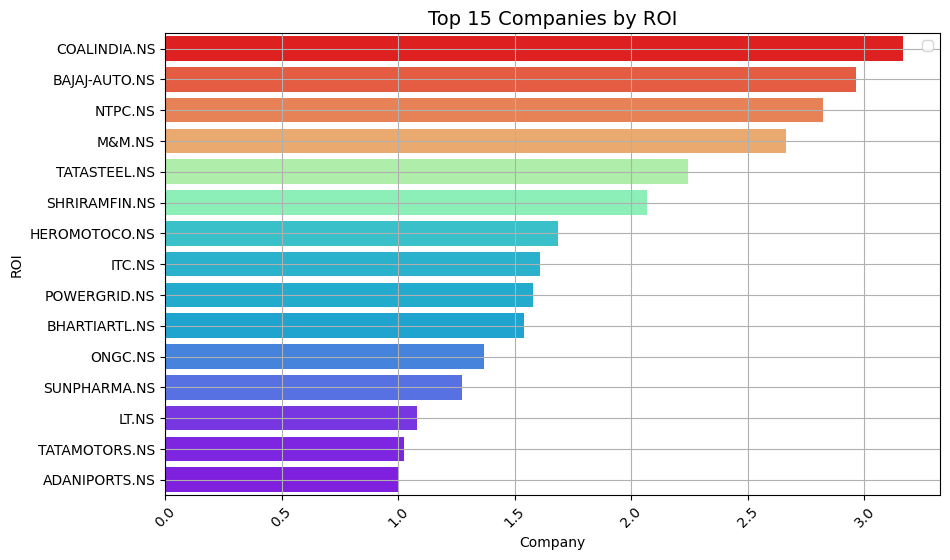

In [7]:
plot_stock(cv_roi_df,'ROI',acc=False)

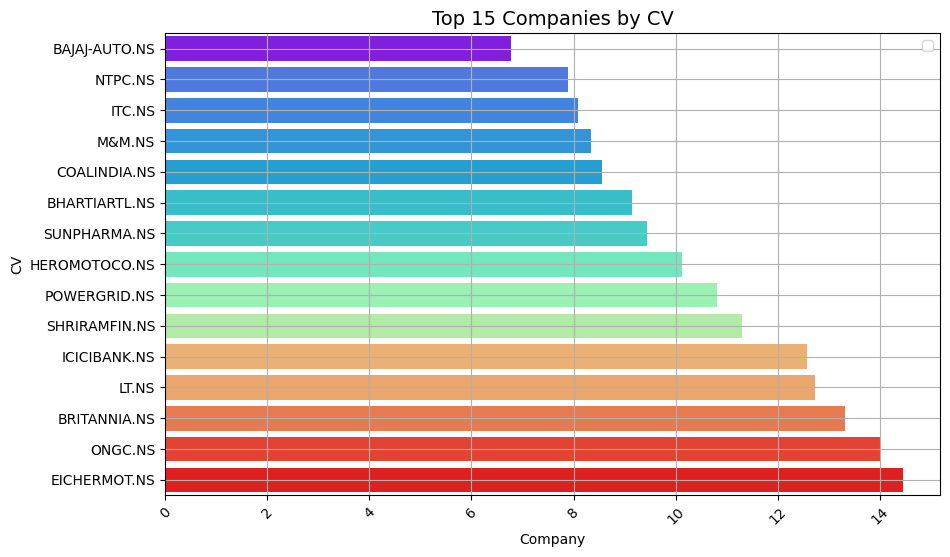

In [8]:
plot_stock(df=cv_roi_df,col='CV',acc=True)

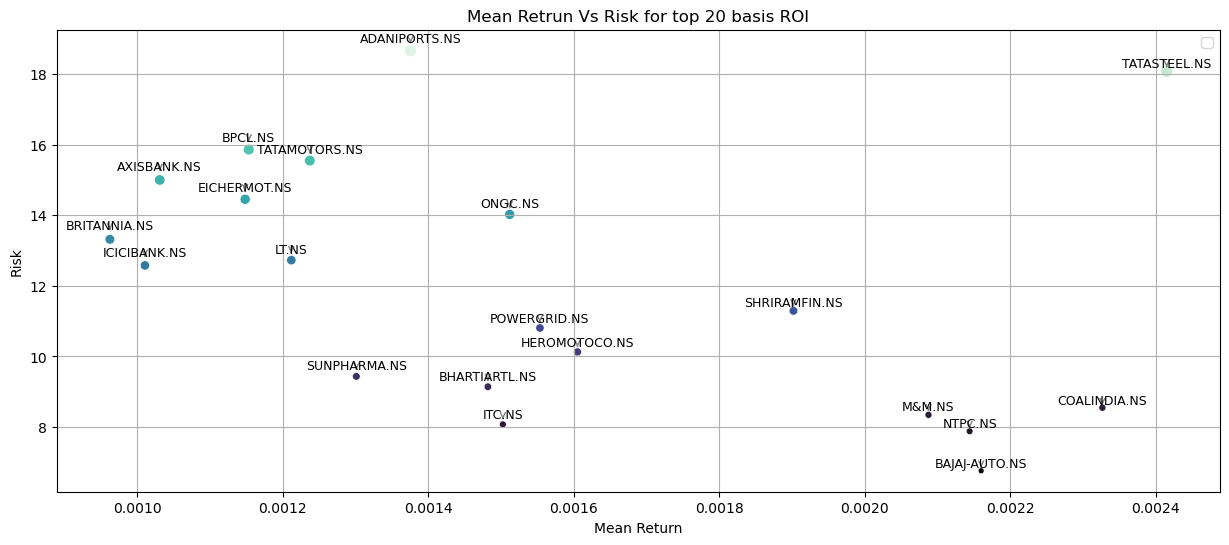

In [15]:

high_roi = cv_roi_df.sort_values(by='ROI',ascending=False).head(20)
plt.figure(figsize=(15,6))
sns.scatterplot(x=high_roi['Mean'],y=high_roi['CV'],palette='mako',size=high_roi['CV'], hue=high_roi['CV'])


for i, label in enumerate(high_roi.index.values):
    x = high_roi['Mean'].iloc[i]
    y = high_roi['CV'].iloc[i] + (i * 0.01)
    plt.annotate(label, 
                 (x, y), 
                 arrowprops=dict(arrowstyle='->', color='grey'),
                 fontsize=9, 
                 ha='center', 
                 va='bottom', 
                 )
plt.title("Mean Retrun Vs Risk for top 20 basis ROI")
plt.grid()
plt.ylabel('Risk')
plt.xlabel("Mean Return")
plt.legend([])
plt.show()

## Checking All stock closing data

In [10]:
data = get_stock_data('Nifty50_2024-09-22')
data.head()

,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJFINANCE.NS,BAJAJFINSV.NS,BPCL.NS,BHARTIARTL.NS,...,SBIN.NS,SUNPHARMA.NS,TCS.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2019-09-23,150.916733,396.475403,1449.718384,1732.781738,722.352661,2570.164551,3956.744873,827.851196,165.429810,335.439575,...,295.315430,388.924286,1809.796509,263.300598,127.110367,15.180787,587.597534,1281.462158,4286.056641,234.427048
2019-09-24,146.609085,399.273254,1432.564209,1697.362427,701.344238,2538.414795,3895.777344,822.159363,169.264236,336.066101,...,284.820557,389.114166,1835.743042,264.599579,130.091827,14.917279,605.712585,1262.754883,4214.706055,235.749268
2019-09-25,146.113953,400.189819,1407.375244,1683.809326,691.935181,2523.698242,3865.441162,823.645935,170.695236,329.318726,...,263.783752,386.359558,1875.021851,268.881287,122.290306,14.565266,607.476746,1239.554443,4175.516113,233.888351
2019-09-26,151.213821,404.386566,1409.001831,1702.215820,696.863770,2548.841064,3934.177002,844.497437,176.144150,331.632111,...,265.289734,391.298889,1874.258911,269.314240,123.731346,15.116416,614.189148,1258.505737,4290.448730,232.223328
2019-09-27,147.995468,394.208191,1380.756958,1707.358521,697.560608,2537.856934,3989.834717,853.052551,172.383118,336.499847,...,264.677917,381.562744,1846.022705,271.286713,119.159752,14.468715,606.099792,1254.353882,4290.008789,231.733627


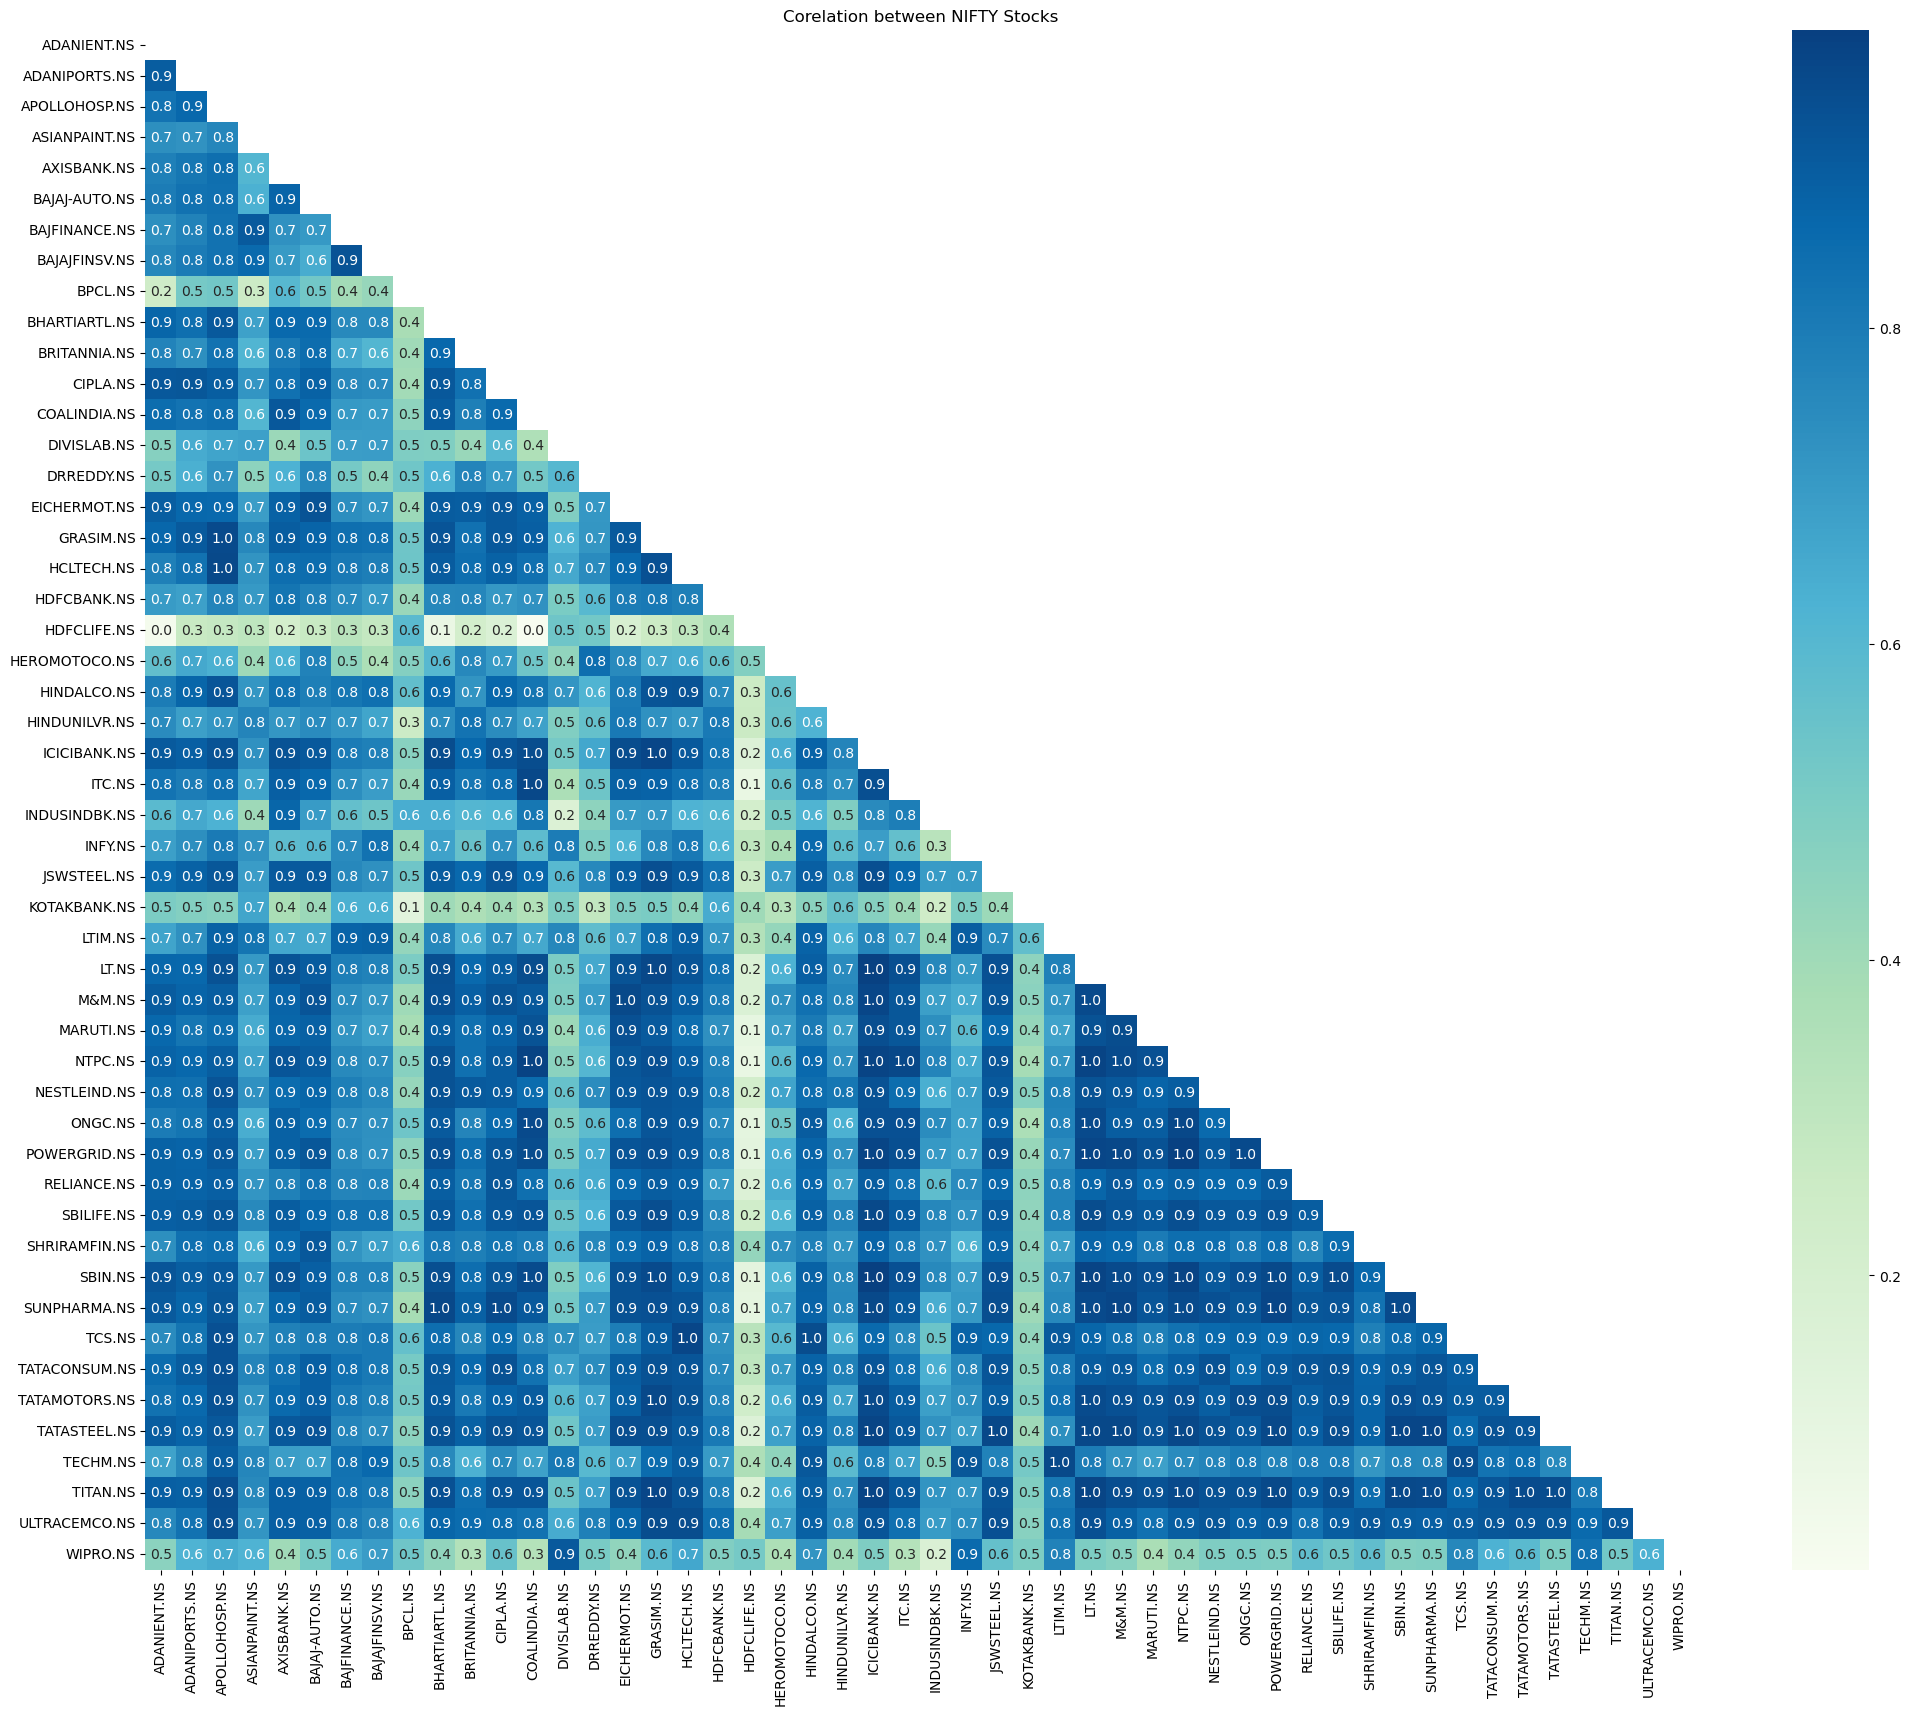

In [11]:
cor_mat = data.corr(method='spearman')
mask = mask = np.triu(np.ones_like(cor_mat, dtype=bool))
plt.figure(figsize=(25,20))
sns.heatmap(cor_mat,mask=mask,annot=True, fmt='0.1f',cmap='GnBu')
plt.title("Corelation between NIFTY Stocks")
plt.show()

- All data are positivly coreleated. That means if one goes down other also going down.
- Many stocks corr are very high.
- We will consider a threshold of 0.8 and check the stocks

In [12]:
upper_tri = cor_mat.where(np.triu(np.ones(cor_mat.shape), k=1).astype(bool))

# Find the columns with any correlation greater than 0.9
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]

high_corr_pairs = upper_tri.stack().reset_index()
high_corr_pairs.columns = ['Feature1', 'Feature2', 'Correlation']
high_corr_pairs = high_corr_pairs[high_corr_pairs['Correlation'] > 0.9]
high_corr_pairs

,Feature1,Feature2,Correlation
10,ADANIENT.NS,CIPLA.NS,0.915541
22,ADANIENT.NS,ICICIBANK.NS,0.907099
30,ADANIENT.NS,M&M.NS,0.905060
39,ADANIENT.NS,SBIN.NS,0.923000
40,ADANIENT.NS,SUNPHARMA.NS,0.905598
...,...,...,...
1212,TATAMOTORS.NS,TITAN.NS,0.953580
1213,TATAMOTORS.NS,ULTRACEMCO.NS,0.920873
1216,TATASTEEL.NS,TITAN.NS,0.950598
1217,TATASTEEL.NS,ULTRACEMCO.NS,0.919544
